In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
A=pd.read_csv('C:/Users/dell/Desktop/chandra/cars93.csv')

In [3]:
A.head(2)

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend


In [4]:
B=A[['Price','MPG.highway']]

In [5]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
C=pd.DataFrame(mm.fit_transform(B),columns=B.columns)

In [6]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
model=km.fit(C)

In [7]:
model.labels_

array([2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 0])

In [8]:
model.cluster_centers_

array([[0.48842289, 0.18571429],
       [0.05565749, 0.55555556],
       [0.18114769, 0.24705882]])

In [9]:
Q=pd.DataFrame(mm.inverse_transform(model.cluster_centers_),columns=['X','Y'])

In [10]:
Q

,X,Y
0,34.019048,25.571429
1,10.433333,36.666667
2,17.272549,27.411765


Text(0.5, 1.0, 'scatterplot between price and MPG.highway')

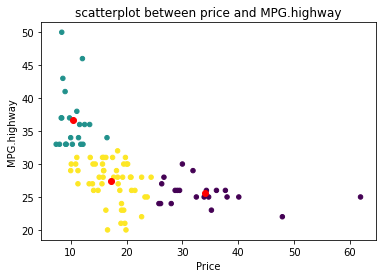

In [11]:
import matplotlib.pyplot as plt
plt.scatter(B.Price,B['MPG.highway'],s=20,c=model.labels_)
plt.xlabel('Price')
plt.ylabel('MPG.highway')
plt.scatter(Q.X,Q.Y,c='red')
plt.title('scatterplot between price and MPG.highway')

# elbow curve

In [12]:
wcss=[]
k=range(2,20,1)
for i in range(2,20,1):
    from sklearn.cluster import KMeans
    km=KMeans(n_clusters=i)
    model=km.fit(C)
    wcss.append(model.inertia_)

([<matplotlib.axis.XTick at 0x214de74d850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

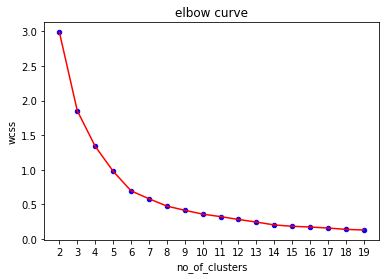

In [13]:
import matplotlib.pyplot as plt
plt.scatter(k,wcss,s=20,c='blue')
plt.plot(k,wcss,c='red')
plt.xlabel('no_of_clusters')
plt.ylabel('wcss')
plt.title('elbow curve')
plt.xticks(range(2,20,1))

In [14]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=6)
model=km.fit(C)


In [15]:
model.labels_

array([2, 3, 3, 3, 3, 2, 2, 0, 3, 3, 3, 4, 4, 2, 2, 0, 0, 0, 3, 2, 2, 3,
       4, 2, 2, 0, 2, 0, 4, 2, 4, 2, 2, 2, 2, 0, 2, 0, 1, 4, 2, 1, 2, 4,
       2, 4, 2, 5, 3, 3, 3, 3, 4, 4, 4, 0, 3, 3, 5, 2, 2, 4, 0, 4, 2, 0,
       0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 3, 4, 4, 2, 2, 1, 4, 2, 2, 0, 4,
       0, 2, 0, 2, 3])

In [16]:
B['clusters']=model.labels_

In [17]:
B['model']=A['Model']

In [31]:
m=input('enter the name of the model: ')
cluster_no=list(B[B.model==m].clusters)[0]
simi=list(B[(B.clusters==cluster_no)&(B.model!=m)].model)
print('for the given car',m)
print('---------------------')
print('similar cars',simi)

enter the name of the model: Integra
for the given car Integra
---------------------
similar cars ['Century', 'LeSabre', 'Camaro', 'Lumina', 'Concorde', 'LeBaron', 'Shadow', 'Spirit', 'Dynasty', 'Vision', 'Escort', 'Tempo', 'Mustang', 'Probe', 'Taurus', 'Prelude', 'Accord', 'Elantra', 'Sonata', 'Capri', 'Cougar', 'Altima', 'Achieva', 'Cutlass_Ciera', 'Eighty-Eight', 'Laser', 'Sunbird', 'Firebird', 'Grand_Prix', 'Bonneville', 'Loyale', 'Legacy', 'Celica', 'Camry', 'Passat', '240']


['90',
 '100',
 '535i',
 'Riviera',
 'DeVille',
 'Seville',
 'Corvette',
 'Imperial',
 'ES300',
 'SC300',
 'Continental',
 'Town_Car',
 'RX-7',
 '190E',
 '900',
 '850']